# Sufficient Statistics and Exchangeability

##### Keywords: sufficient statistics, exponential family, exchangeability, poisson distribution, gamma, poisson-gamma, bayesian, conjugate prior

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sn

from scipy.stats import norm


//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Contents
{:.no_toc}
* 
{: toc}

## Sufficient Statistics and the Exponential Family

Probability distributions that belong to an exponential family have natural conjugate prior distributions. The form of the exponential family is:

$$p(y_i \vert \theta) = f(y_i)g(\theta) e^{\phi(\theta)^{T} u(y_i)}.$$

Thus the likelihood corresponding to n i.i.d. points is:

$$ p(y \vert \theta) = \left(\prod_{i=1}^{n} f(y_i) \right) g(\theta)^n \,\, \exp\left(\phi(\theta)\sum_{i=1}^{n} u(y_i)\right)$$

Now notice that the product of y -dependent stuff in front is irrelavant as far as sampling goes: it does not  **interact with $\theta$** in any way! If I wanted the actual value of the likelihood it would be important to model it well. But if all I want is to use this expression in a samples generator, I dont care. This kind of observation will bve critical for us as we sample from ever more complex models: indeed isolating such dependencies is at the cornerstone of the gibbs method.

Thus one can say, that for all n and y, this has a fixed form as a functio of $\theta$:

$$ p(y \vert \theta)  \propto g(\theta)^n \, e^{\phi (\theta)^T   t(y)}$$

where $t(y) = \sum_{i=1}^{n} u(y_i)$ is said to be a **sufficient statistic for $\theta$ **, because the likelihood for theta "depends" on y only through $t(y)$.

In general the exponential families are the only classes of distributions that have natural conjugate prior distributions, since, apart from some special cases, they are the only distributions having a fixed number of sufficient statistics for all $n$.

This family includes exponential, poisson, gamma, beta, pareto, binomial, gaussian....

## An example with Poissons and Gammas

Consider some data gathered in the 1990s on educational attainment.
The data consists of 155 women who were 40 years old. We are interested in the birth rate of women with a college degree and women without. We are told that 111 women without college degrees have 217 children, while 44 women with college degrees have 66 children. 

Let $Y_{1,1}, \ldots, Y_{n_1,1}$ denote the number of children for the $n_1$ women without college degrees 
and $Y_{1,2}, \ldots, Y_{n_2,2}$  be the data for $n_2$ women with college degrees. 

### Exchangeability

Lets assume that the number of children of a women in any one of these classes can me modelled as coming from ONE birth rate (we dont know anything about their individual situations so we treat each woman as interchangeable or exchageable with another within the same class). This is the basis for the IID assumption that we generally use.

Another way to think about it, is that the in-class likelihood for these women is invariant to a permutation of variables. If we assume a Poisson likelihood (low counts) for the number of births for each woman, we have, for each woman:

$$Y_{i,1} \sim Poisson(\theta_{1}),  Y_{i,2} \sim Poisson(\theta_{2})$$

Then, the likelihood for the first population is: 

$$ p(Y_{1,1}, \ldots, Y_{n_1,1}  \vert  \theta_1)  = \prod_{i=1}^{n_1} p(Y_{i,1} \vert \theta_1) =  \prod_{i=1}^{n_1}  \frac{1}{Y_{i,1} !} \theta_1^{Y_{i,1}} e^{-\theta_1}
= c(Y_{1,1}, \ldots, Y_{n_1,1}) \,\, (n_{1}\theta_{1})^{\sum Y_{i,1}} e^{-n_1 \theta_1}
  \sim Poisson(n_1 \theta_1) $$
  

  
  and similarly

$$ Y_{1,2}, \ldots, Y_{n_1,2}  \vert  \theta_2 \sim Poisson(n_2\theta_2) $$

** The distributions are still poisson **

### Obtaining the Posterior

The posterior is a simple product of two sub-posteriors:

$$p(\theta_1 \vert  Y_{1,1}, \ldots, Y_{n_1,1} )* p(\theta_2 \vert  Y_{1,2}, \ldots, Y_{n_2,2} ) ,$$ which, given independent priors on

$\theta_1$ and $\theta_2$, is:

$$c_1(n_1, y_1, \ldots, y_{n_1}) \,\, (n_{1}\theta_{1})^{\sum Y_{i,1}} e^{-n_1 \theta_1}\, p(\theta_1) \times c_2(n_2, y_1, \ldots, y_{n_2}) \,\, (n_{2}\theta_{2})^{\sum Y_{i,2}} e^{-n_2 \theta_2}  \, p(\theta_2) $$
  
The quantity $\sum Y_i$ contains all the information about $\theta$ and thus $\sum Y_i$ is **sufficient statistics**. Indeed all you need is the **total number of children in each class of mom** as far as making any inferences about the $\theta_{1 or 2}$ are concerned.

So as long as we dont need the exact value of the likelihood, we are go ob treating the likelihood as a 

For our example we have $n_1 =111$, $\sum_i^{n_1} Y_{i,1} =217$ and $n_2=44$, $\sum_i^{n_2} Y_{i,2} =66$.

### Congugate Priors

Lets now choose priors. A class of priors is said to be **conjugate** for a sampling  distribution
$p(y_1, \ldots, y_n \vert  \theta)$ if the posterior is also in the class. 

For the Poisson :

$$ p(Y_1, \ldots, y_n \vert  \theta)  \sim  \theta^{\sum Y_i} e^{-n \theta} $$

Keeping the same functional form means our conjugate class has to include terms like $\theta^{c_1} e^{-c_2 \theta}$. 

This is a known family known as Gamma distributions.  In the shape-rate parametrization (see wikipedia)

$$p(\theta) =  \rm{Gamma}(\theta, a, b) = \frac{b^a}{\Gamma(a)} \theta^{a-1} e^{-b \theta} $$

If $p(\theta) =  \rm{Gamma}(\theta, a, b)$ and $ p(Y_1 \ldots, Y_n  \vert  \theta) \sim \rm{Poisson}(\theta) $  then our posterior is:

$$  p( \theta  \vert  Y_1, \ldots, Y_n) \sim \rm{Gamma}(\theta, a+\sum Y_i, b+n) $$

In other words $b$ "regularizes" the total number of moms and $a$ the kids. In other words, you have a data set of $b$ observations with an observed poisson count of $a$.

Back to our example. Suppose we choose priors $p(\theta_{1,2}) \sim  \rm{Gamma}(\theta_{1,2}, a=2, b=1) $. The mean and variance of gamma distributions are known 

$$ E[\theta] = a/b, var[\theta] = a/b^2 .$$

So the mean of the gamma is roughly a notion  of your belief of prior kids to moms. Here we say 2.



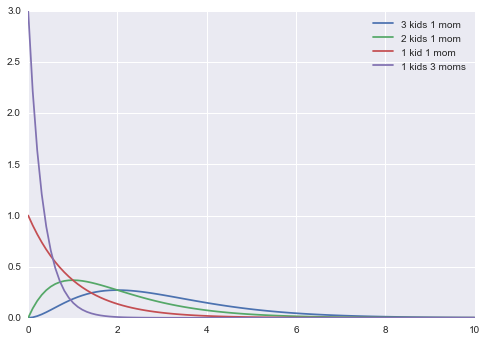

In [18]:
from scipy.stats import gamma
xxx=np.linspace(0,10,100)
plt.plot(xxx, gamma.pdf(xxx, 3, scale=1), label="3 kids 1 mom");
plt.plot(xxx, gamma.pdf(xxx, 2, scale=1), label="2 kids 1 mom");
plt.plot(xxx, gamma.pdf(xxx, 1, scale=1), label="1 kid 1 mom");
plt.plot(xxx, gamma.pdf(xxx, 1, scale=1/3), label="1 kids 3 moms");
plt.legend();

### Our Posteriors

$$ p(\theta_1 \vert n_1 = 111,  \sum_i^{n_1} Y_{i,1}=217 ) \sim  \rm{Gamma}(\theta_1, 2+217, 1+111) =  \rm{Gamma}(\theta_1, 219, 112) $$

$$ p(\theta_2 \vert n_2 = 44,  \sum_i^{n_2} Y_{i,2}=66 ) \sim  \rm{Gamma}(\theta_2, 2+66, 1+44) =  \rm{Gamma}(\theta_2, 68, 45) $$

The mean of our posterior is then a ratio of posterior kids to moms:

$$ E[\theta] = (a + \sum y_i)/(b + N), var[\theta] = (a + \sum y_i)/(b + N)^2 .$$

In this case  219/112 and 68/45 which is not very sensitive to our prior as you might expect.

In [38]:
219/112, 68/45

(1.9553571428571428, 1.511111111111111)

We can calculate and plot the posterior predictives. We  do that here for $\theta_1$ and $\theta_2$. We also show  (lack of) sensitivity to the prior by considering a wierd prior with a=20, b=2.

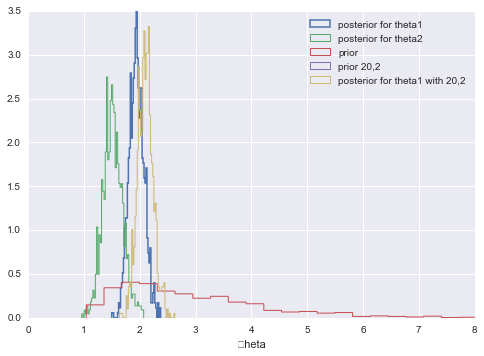

In [53]:
from scipy.stats import gamma
a = 2 # Gamma prior, a,b values 
b = 1 

n1 = 111
sy1 = 217  # sum of y1
n2 = 44 
sy2=66     #sum of y2
N=1000


# ACTUAL VALUES 
# posterior mean 
(a+sy1)/(b+n1) 
(a+sy2)/(b+n2)

# EXACT POSTERIORS


theta1=gamma.rvs(a+sy1, scale=1.0/( b+n1), size=N)
q=plt.hist(theta1, 50,linewidth=1.5,normed=True, histtype='step',   label=u'posterior for theta1')
theta2 = gamma.rvs(a+sy2,scale= 1./(b+n2), size=N)
q=plt.hist(theta2, 50, linewidth=1,histtype='step', alpha=1.0,normed=True,   label=u'posterior for theta2') 



th_prior = gamma.rvs(2.0, 1.0, size=N);
plt.hist(th_prior, 50,linewidth=1, histtype='step',alpha=1.0, normed=True,   label=u'prior') 

#just for theta1, try a wierd pri
th_priorwierd = gamma.rvs(20.0, 1.0, size=N);
theta1wierd=gamma.rvs(20+sy1, scale=1.0/( 2+n1), size=N)
plt.hist(th_priorwierd, 50,linewidth=1, histtype='step',alpha=1.0, normed=True,   label=u'prior 20,2') 
plt.hist(theta1wierd, 50, linewidth=1,histtype='step', alpha=1.0,normed=True,   label=u'posterior for theta1 with 20,2') 




#plt.xlim( [0,8])
plt.xlabel('\theta')



# ## MONTE CARLO APPROACH - REJECTION METHOD 

# a =2.0 
# b = 1.0 
# prior = lambda theta:  gamma.pdf(theta, a ,b)
# pdf_s1 = lambda theta: prior(theta)*  poisson.pmf(sy1, n1*theta)
# pdf_s2 = lambda theta:  prior(theta)* poisson.pmf(sy2, n2*theta)


plt.xlim([0,8])
plt.legend()


## Finally we can do inference as we wish

The mean birth-rates can be calculated from the samples, as can the variances, which are also given us by the formulae from above:

$$ E[\theta] = (a + \sum y_i)/(b + N), var[\theta] = (a + \sum y_i)/(b + N)^2 .$$



In [41]:
np.mean(theta1), np.var(theta1)

(1.9516881521791478, 0.018527204185785785)

In [42]:
np.mean(theta2), np.var(theta2)

(1.5037252100213609, 0.034220717257786061)

Its easy to get the posterior birth-rate difference from the samples

In [21]:
np.mean(theta1 - theta2)

(0.43687373794997003, -0.43687373794997003)

### Posterior predictives

Remember that the posterior predictive  is the following integral

$$p(y^{*} \vert D) = \int d\theta p(y^{*} \vert \theta) p(\theta \vert D)$$

From the perspective of sampling, all we have to do is to first draw the thetas from the posterior, then draw y's from the likelihood, and histogram the likelihood. This is the same logic as marginal posteriors, with the addition of the fact that we must draw  y from the likelihood once we drew $\theta$. You might think that we have to draw multiple $y$s at a theta, but this is already taken care of for us because of the nature of sampling. We already have multiple $\theta$a in a bin.

In [22]:
from scipy.stats import poisson
postpred1 = poisson.rvs(theta1)
postpred2 = poisson.rvs(theta2)

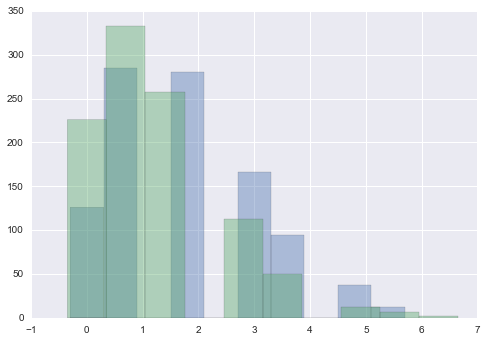

In [31]:
plt.hist(postpred1, alpha=0.4, align="left");
plt.hist(postpred2, alpha=0.4, align="left");

It turns out that the distribution characterizing the posterior predictive is a negative binomial (see wikipedia, this requires some manipulations of gamma functions which we shall not reproduce here). The mean of  the posterior predictive distribution is the same as that of the posterior

$$ E[y^*] = \frac{(a + \sum y_i)}{(b + N)}, var[y^*] = \frac{(a + \sum y_i)}{(b + N)^2} (N + b + 1) .$$

In [43]:
np.mean(postpred1), np.var(postpred1)

(1.976, 1.8554239999999997)

In [44]:
np.mean(postpred2), np.var(postpred2)

(1.502, 1.5719960000000002)

Notice that the error on the posterior predictive is much larger, even with the same means. The reason for this is that in the posterior predictive, you are smearing out the posterior error. At each point in the posterior, there is the smearing associated with the sampling distribution for $y^* \sim \theta$, and thus the posterior predictive is conservative.

In [45]:
np.mean(postpred1 - postpred2)

0.47399999999999998

Why bother with the posterior predictive?

- you might want to make predictions
- model checking: is the model kosher?

There are multiple ways of accomplishing the latter (all of which we shall see). 

- Future observations could be compared to the posterior predictive.
- cross-validation could be used for this purpose to calculate a prediction error
- just plotting posterior predictives can be useful since sometimes a visual inspection of simulation data gives away the fact that it looks nothing like actual data.